# I. Exercise Set #1: SF Temps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from vega_datasets import data
df = data.sf_temps()

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

First, make the date the index.

In [4]:
df = df.set_index('date')
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


<AxesSubplot:xlabel='date'>

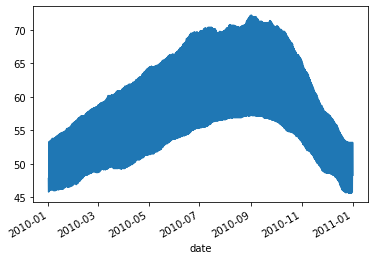

In [11]:
df.temp.plot()

In [6]:
df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

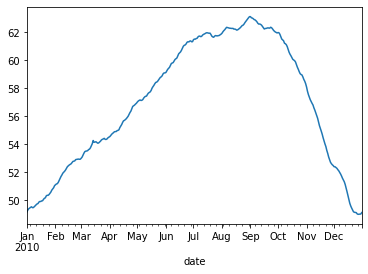

In [10]:
df_daily.temp.plot()

## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

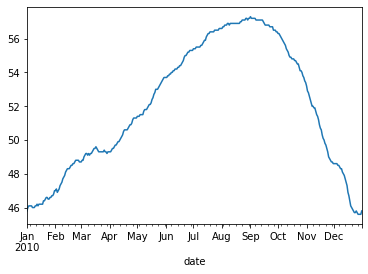

In [12]:
df_daily_min = df.resample('D').min()
df_daily_min.temp.plot()

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

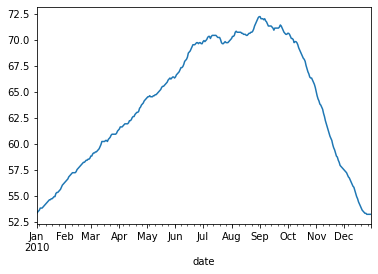

In [13]:
df_daily_max = df.resample('D').max()
df_daily_max.temp.plot()

## 4. Which month is the coldest, on average?

In [15]:
df_monthly = df.resample('M').mean()
df_monthly

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


#### January is the coldest month with an avg temp just under 50 degrees.

## 5. Which month has the highest average temperature?

#### From above, it shows September is the warmest month at nearly 62.5 degrees.

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
df_daily_range = df.resample('D').agg(['min','max'])
df_daily_range.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [20]:
df_daily_range.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [25]:
df_daily_range['range'] = df_daily_range[('temp', 'max')] - df_daily_range[('temp', 'min')]
df_daily_range.head()

temp       range
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7

<AxesSubplot:xlabel='date'>

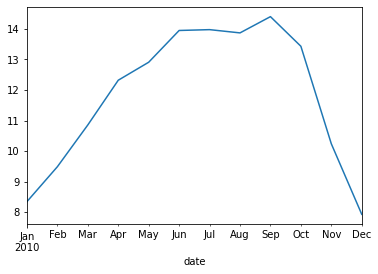

In [26]:
df_monthly_range = df_daily_range.resample('M').mean()
df_monthly_range.range.plot()

In [27]:
df_monthly_range

temp                 range
                  min        max           
date                                       
2010-01-31  46.309677  54.651613   8.341935
2010-02-28  48.064286  57.550000   9.485714
2010-03-31  49.238710  60.093548  10.854839
2010-04-30  50.326667  62.646667  12.320000
2010-05-31  52.403226  65.312903  12.909677
2010-06-30  54.480000  68.430000  13.950000
2010-07-31  56.045161  70.022581  13.977419
2010-08-31  56.941935  70.812903  13.870968
2010-09-30  56.903333  71.306667  14.403333
2010-10-31  54.932258  68.364516  13.432258
2010-11-30  50.776667  61.013333  10.236667
2010-12-31  47.025806  54.951613   7.925806

#### September has the greatest daily temp range at 14.4 degrees per day.

## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines

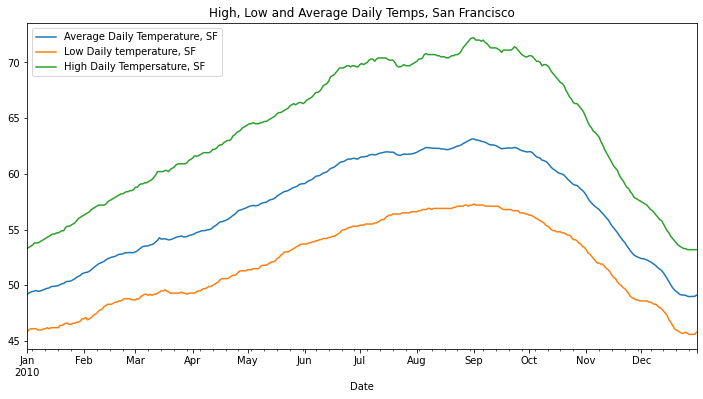

In [43]:
plt.figure(figsize = (12,6))
df_daily.temp.plot(label='Average Daily Temperature, SF')
df_daily_min.temp.plot(label='Low Daily temperature, SF')
df_daily_max.temp.plot(label='High Daily Tempersature, SF')
plt.title("High, Low and Average Daily Temps, San Francisco")
plt.xlabel("Date")
plt.legend()
plt.show()

----

# II. Exercise Set #2: Seattle Temps

In [45]:
df_seattle = data.seattle_weather()
df_seattle.info()
df_seattle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [49]:
df_seattle = df_seattle.set_index('date')

## 1. Which year and month combination has the highest amount of precipitation?

In [56]:
df_seattle_monthly = df_seattle.resample('M').sum()
df_seattle_monthly[df_seattle_monthly.precipitation == df_seattle_monthly.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


#### December of 2015 had the most precipitation at 284.5 (cm I am guessing?)

## 2. Visualize the amount of monthly precipitation over time.

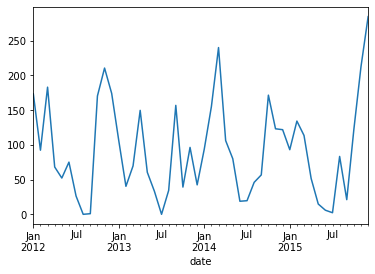

In [58]:
df_seattle_monthly.precipitation.plot()
plt.show()

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

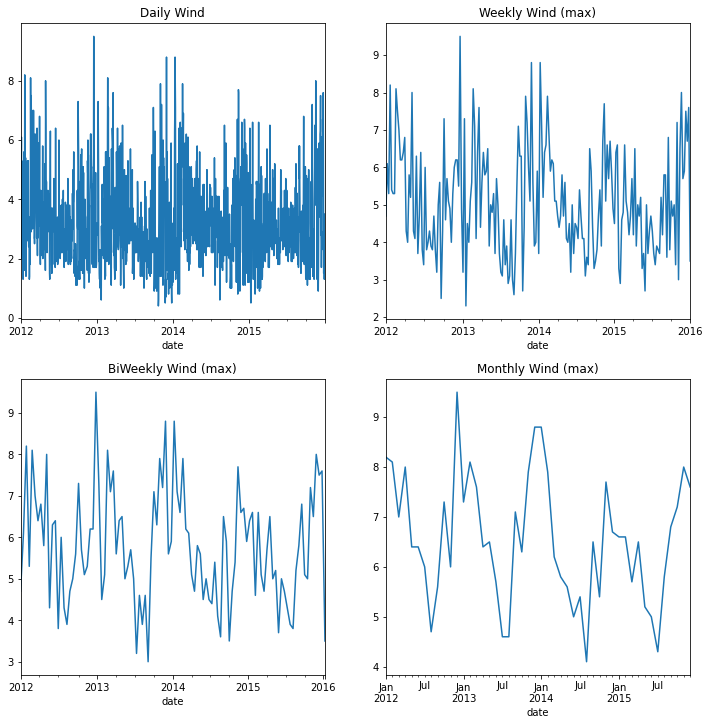

In [66]:
# Assumed wind reported was the average wind for the day, but then max works better for the rest

plt.figure(figsize=(12,12))
plt.subplot(221)
df_seattle.wind.plot(title='Daily Wind')
plt.subplot(222)
df_seattle.resample('W').max().wind.plot(title="Weekly Wind (max)")
plt.subplot(223)
df_seattle.resample('2W').max().wind.plot(title="BiWeekly Wind (max)")
plt.subplot(224)
df_seattle.resample('M').max().wind.plot(title="Monthly Wind (max)")
plt.show()

## 4. Which year-month combination is the windiest?

It looks to be either December 2012 or January 2013, let's check:

In [68]:
df_seattle_monthly = df_seattle.resample('M').max()
df_seattle_monthly['wind'].nlargest(3)

date
2012-12-31    9.5
2013-12-31    8.8
2014-01-31    8.8
Name: wind, dtype: float64

#### December 2012 is the windiest month.

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [72]:
df_seattle['sunny'] = df_seattle['weather'] == 'sun'

In [75]:
df_seattle_yearly = df_seattle.resample('Y').sum()
df_seattle_yearly

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2012-12-31,1226.0,5591.3,2668.0,1244.7,118
2013-12-31,828.0,5861.5,2976.2,1100.8,205
2014-12-31,1232.8,6203.5,3161.8,1236.5,211
2015-12-31,1139.2,6361.2,3225.0,1153.3,180


#### 2014 was the sunniest year

## 6. In which month does it rain the most?

In [99]:
df_seattle = df_seattle.reset_index()

In [109]:
df_seattle['month'] = df_seattle.date.dt.month
df_seattle.head(2)

,date,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1


In [101]:
df_seattle.set_index('date')

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,False,False,12
2015-12-28,1.5,5.0,1.7,1.3,fog,False,False,12
2015-12-29,0.0,7.2,0.6,2.6,fog,False,False,12


In [111]:
df_seattle.groupby('month').rainy.sum()

month
1     35
2     40
3     37
4     20
5     16
6     19
7     14
8      6
9      4
10    20
11    25
12    23
Name: rainy, dtype: int64

#### February is the rainiest month.

## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [114]:
df_seattle['precipitation?'] = df_seattle['precipitation'] > 0
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month,precipitation?
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1,False
1,2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1,True
2,2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1,True
3,2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1,True
4,2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1,True


In [116]:
df_seattle.groupby('month')['precipitation?'].sum()

month
1     66
2     73
3     73
4     59
5     34
6     37
7     11
8     22
9     35
10    61
11    71
12    81
Name: precipitation?, dtype: int64

#### December is the month with most non-zero precipitation days.

# III. Exercise Set #3: Flights_20k

In [203]:
df_flights = data.flights_20k()
df_flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


## 1. Convert any negative delays to 0.

In [204]:
df_flights['delay'].mask(df_flights['delay'] < 0, 0, inplace=True)
df_flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


##### Other ways to do this - use a lambda function (as opposed to .apply or even .mask as used above)

## 2. Which hour of the day has the highest average delay?

In [205]:
df_flights['hour'] = df_flights.date.dt.hour

In [206]:
df_flights = df_flights.set_index('date').sort_values(by='date')

In [207]:
df_flights_hourly = df_flights.resample('H').mean()
# Dropping nulls since backfill doesn't matter
df_flights_hourly.dropna()
df_flights_hourly.head()
df_flights.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

#### 3am has the highest average delay - 5 hours!

## 3. Does the day of the week make a difference in the delay amount?

In [223]:
df_flights_day = df_flights.reset_index()
df_flights_day['weekday'] = df_flights_day.date.dt.day_name()
df_flights_day = df_flights_day.set_index('date').sort_values(by='date')
df_flights_day.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

#### Could use an ANOVA here to check, but I am going to assume based on the big difference between Friday and Saturday that day of week does in fact make a difference in the delay amount (although most are in a narrow range).

## 4. Does the month make a difference in the delay amount?

In [216]:
df_flights_month = df_flights.reset_index()
df_flights_month['month'] = df_flights_month.date.dt.month

In [222]:
df_flights_month = df_flights_month.set_index('date').sort_values(by='date')
df_flights_month

,delay,distance,origin,destination,hour,month
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,1
2001-01-01 06:30:00,0,251,MDW,STL,6,1
2001-01-01 07:00:00,0,361,OAK,ONT,7,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,1
...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,21,3
2001-03-31 21:05:00,0,318,FLL,JAX,21,3
2001-03-31 21:05:00,0,451,MCI,IND,21,3


In [225]:
df_flights_month.groupby('month').delay.mean() 

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

#### For this I will use an ANOVA to check.
H0 = There is no differernce between the mean delay amounts.
Ha = There is a difference

In [ ]:
alpha = .05

In [226]:
df_flights_month.month.value_counts()

3    6960
1    6784
2    6256
Name: month, dtype: int64

Assumption 1: Independent = YES!

Assumption 2: Normal?  No, but way more than 30 observations so YES!

<AxesSubplot:>

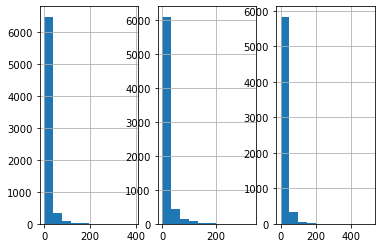

In [241]:
plt.subplot(131)
df_flights_month[df_flights_month.month == 3].delay.hist()
plt.subplot(132)
df_flights_month[df_flights_month.month == 1].delay.hist()
plt.subplot(133)
df_flights_month[df_flights_month.month == 2].delay.hist()

Assumption 3: Equal variances?

In [246]:
print(f'March = {df_flights_month[df_flights_month.month == 3].delay.var()}')
print(f'January = {df_flights_month[df_flights_month.month == 1].delay.var()}')
print(f'February = {df_flights_month[df_flights_month.month == 2].delay.var()}')

March = 443.4708649842003
January = 564.8561024335816
February = 660.6738300152387


Close enough?  Either way ANOVA time.

In [247]:
import scipy.stats as stats

In [249]:
f,p = stats.f_oneway(df_flights_month[df_flights_month.month == 3].delay,df_flights_month[df_flights_month.month == 1].delay,df_flights_month[df_flights_month.month == 2].delay)
f,p

(17.923148071690626, 1.671260064761877e-08)

Yes, month makes a difference on delays, with March leading the field.

# BONUS Exercise Set #1: Iowa Electricity

In [281]:
df_iowa = data.iowa_electricity()
df_iowa.info()
df_iowa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


## 1. For each row, calculate the percentage of the year's total that energy source provided.

In [285]:
df_iowa = df_iowa.rename(columns={'year':'month'})

In [287]:
df_iowa['year'] = df_iowa.month.dt.year

In [288]:
df_iowa = df_iowa.assign(production_percent_of_year = df_iowa.net_generation/(df_iowa.groupby('year').net_generation.transform('sum')))
df_iowa.sort_values(by='year')

,month,source,net_generation,year,production_percent_of_year
0,2001-01-01,Fossil Fuels,35361,2001,0.869868
17,2001-01-01,Nuclear Energy,3853,2001,0.094782
34,2001-01-01,Renewables,1437,2001,0.035350
1,2002-01-01,Fossil Fuels,35991,2002,0.846290
18,2002-01-01,Nuclear Energy,4574,2002,0.107553
35,2002-01-01,Renewables,1963,2002,0.046158
2,2003-01-01,Fossil Fuels,36234,2003,0.860522
19,2003-01-01,Nuclear Energy,3988,2003,0.094711
36,2003-01-01,Renewables,1885,2003,0.044767
3,2004-01-01,Fossil Fuels,36205,2004,0.837381


## 2. Lineplot of generation over time, color by source

<AxesSubplot:xlabel='year', ylabel='net_generation'>

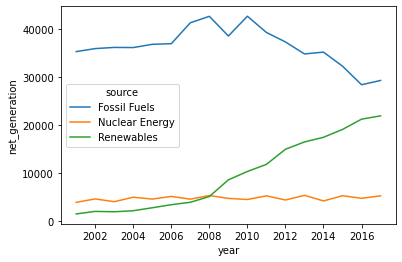

In [289]:
sns.lineplot(data = df_iowa, x='year', y='net_generation', hue='source')

## 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [294]:
df_iowa_pt = df_iowa.pivot_table(index='source', columns='year', values = 'net_generation')
df_iowa_pt

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


## 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

I've got a better idea:

<Figure size 864x432 with 0 Axes>

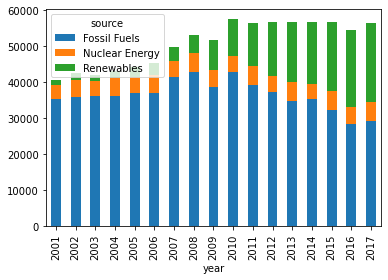

In [303]:
plt.figure(figsize = (12,6))
df_iowa_pt.T.plot(kind='bar',stacked = True)
plt.show()

## 5. Is the total generation increasing over time?

It was increasing through the aughts but has leveled off since 2010.

## 6. How would you control for increasing consumption over time when considering how much energy is coming from each source?

I would normalize each year to one, and within those show the percent of each source within that normalized unit.

## 7. Express each number as a % of the year's total